Loading data from .mat files...
exercise_7p7_data.mat keys: ['__header__', '__version__', '__globals__', 'aluminum_data', 'copper_data']
exercise_7p8_data.mat keys: ['__header__', '__version__', '__globals__', 'cement_data']

Available variables in exercise_7p8_data.mat:
cement_data: shape = (13, 5), type = float64
X and v not found in .mat file. Using manual data.

CEMENT HEAT DATA
 ObsNo  X1  X2  X3  X4     v
     1   7  26   6  60  78.5
     2   1  29  15  52  74.3
     3  11  56   8  20 104.3
     4  11  31   8  47  87.6
     5   7  52   6  33  95.9
     6  11  55   9  22 109.2
     7   3  71  17   6 102.7
     8   1  31  22  44  72.5
     9   2  54  18  22  93.1
    10  21  47   4  26 115.9
    11   1  40  23  34  83.8
    12  11  66   9  12 113.3
    13  10  68   8  12 109.4

PART (a): FULL MODEL WITH ALL FOUR PREDICTORS

Full Model (x1-x4) Analysis

Model: v = 62.405 + 1.551 * x1 + 0.510 * x2 + 0.102 * x3 + -0.144 * x4

R-squared: 0.9824
Adjusted R-squared: 0.9736
Residual Sum o

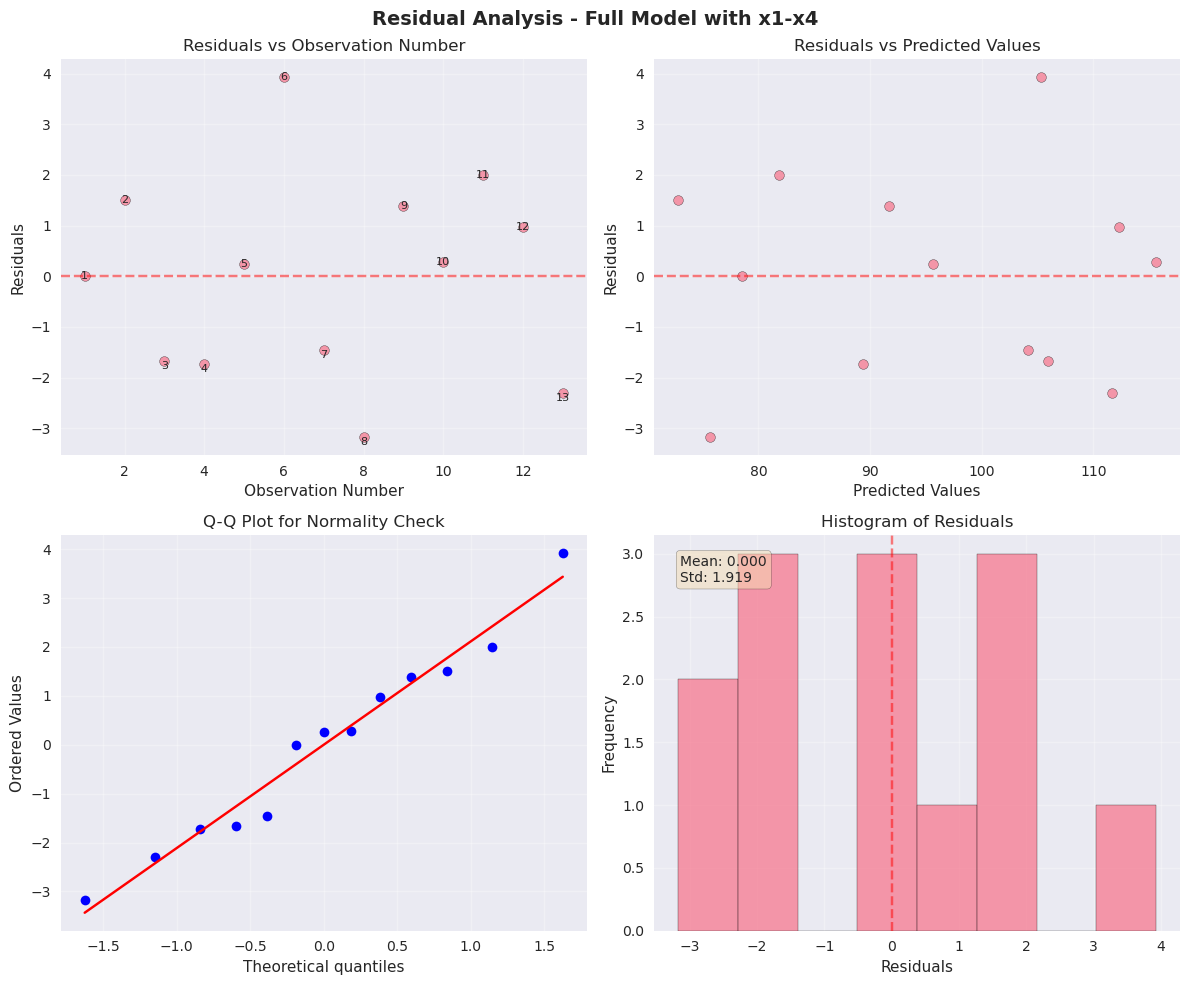

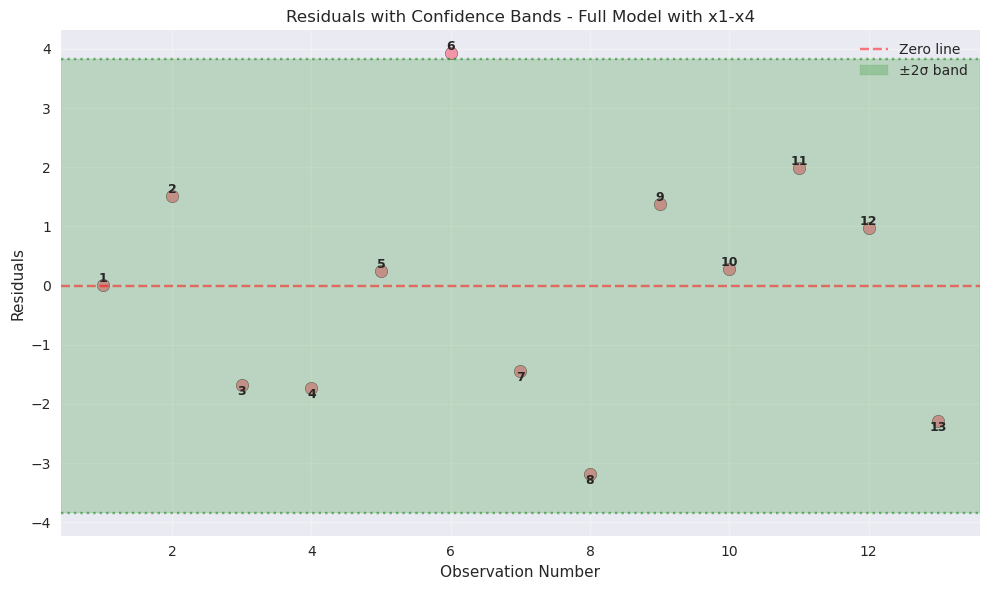


PART (b): REDUCED MODELS

----------------------------------------
MODEL WITH ONLY x1
----------------------------------------

Model with only x1 Analysis

Model: v = 81.479 + 1.869 * x1

R-squared: 0.5339
Adjusted R-squared: 0.4916
Residual Sum of Squares (RSS): 1265.6867
Estimated Error Variance (σ²): 115.0624

Parameter    Estimate     Std Error    2SD CI                    95% CI                   
------------------------------------------------------------------------------------------
Intercept    81.4793      4.9273       [71.6247, 91.3340]  [70.6344, 92.3243]
x1           1.8687       0.5264       [0.8159, 2.9216]  [0.7101, 3.0274]


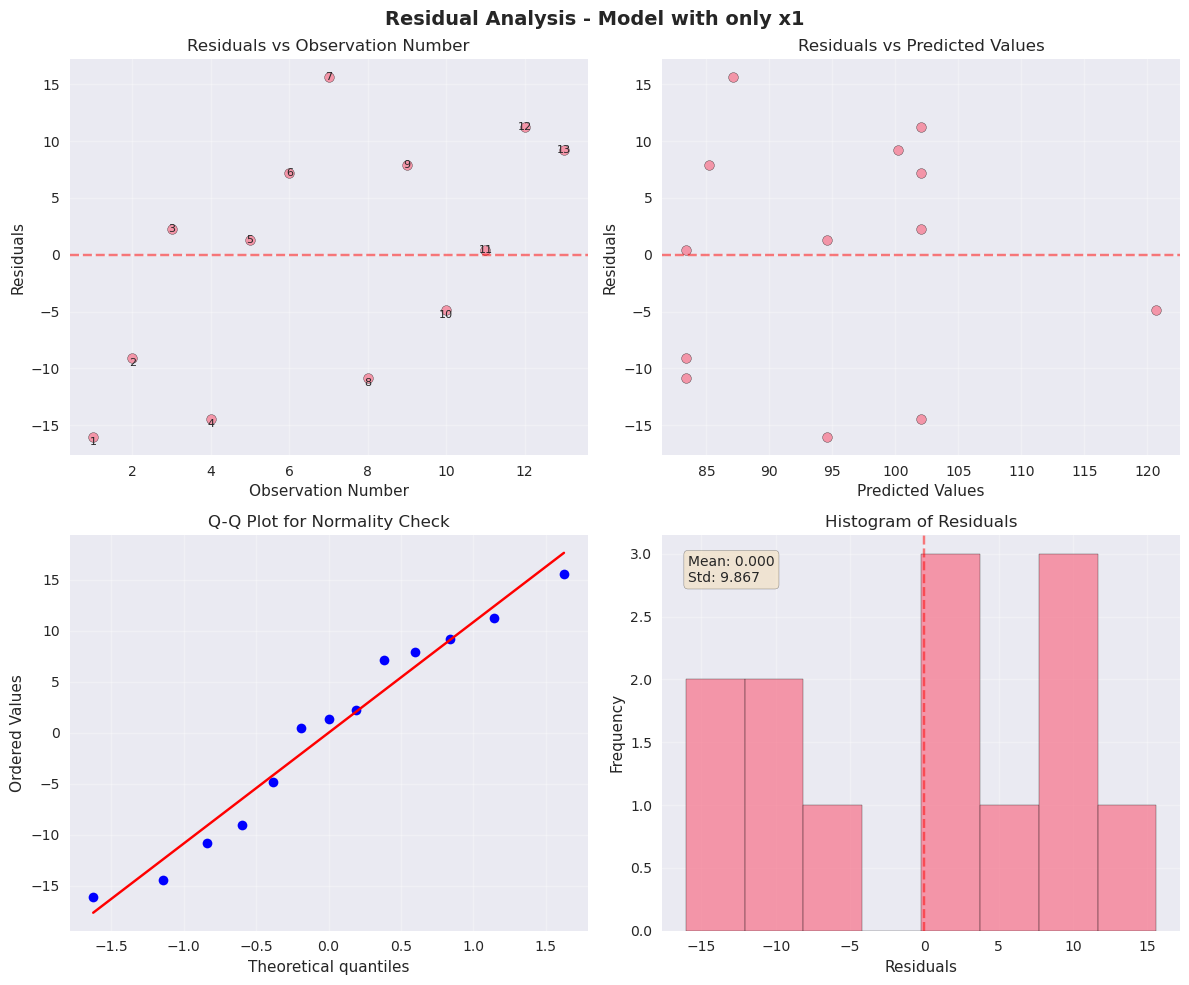

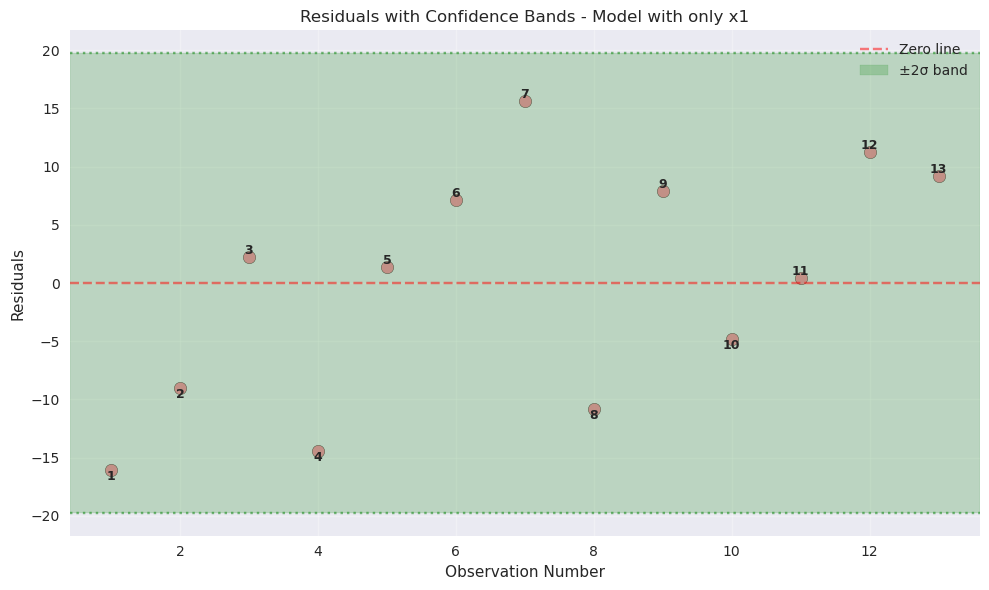


----------------------------------------
MODEL WITH x1 AND x2
----------------------------------------

Model with x1 and x2 Analysis

Model: v = 52.577 + 1.468 * x1 + 0.662 * x2

R-squared: 0.9787
Adjusted R-squared: 0.9744
Residual Sum of Squares (RSS): 57.9045
Estimated Error Variance (σ²): 5.7904

Parameter    Estimate     Std Error    2SD CI                    95% CI                   
------------------------------------------------------------------------------------------
Intercept    52.5773      2.2862       [48.0050, 57.1497]  [47.4834, 57.6713]
x1           1.4683       0.1213       [1.2257, 1.7109]  [1.1980, 1.7386]
x2           0.6623       0.0459       [0.5705, 0.7540]  [0.5601, 0.7644]


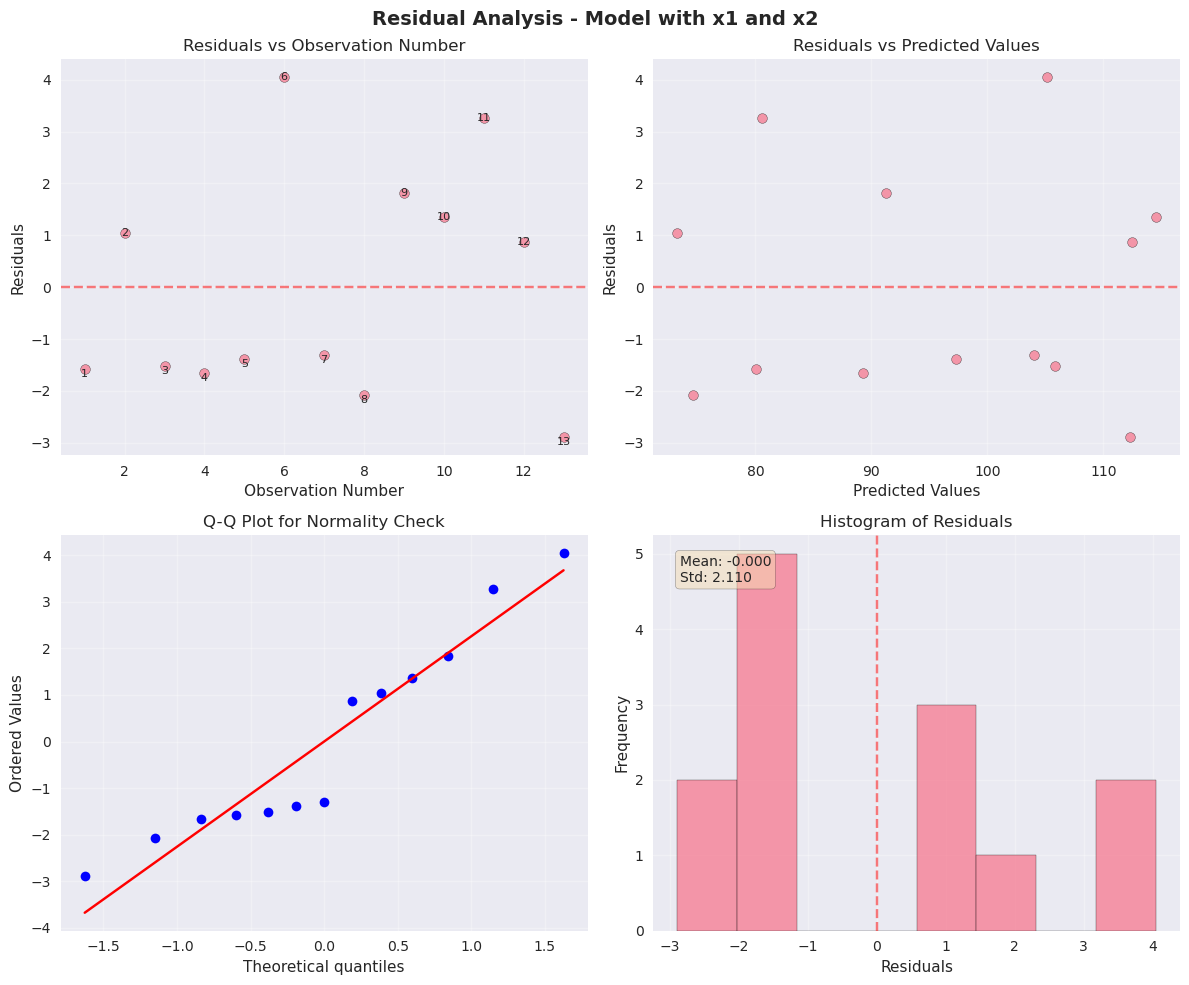

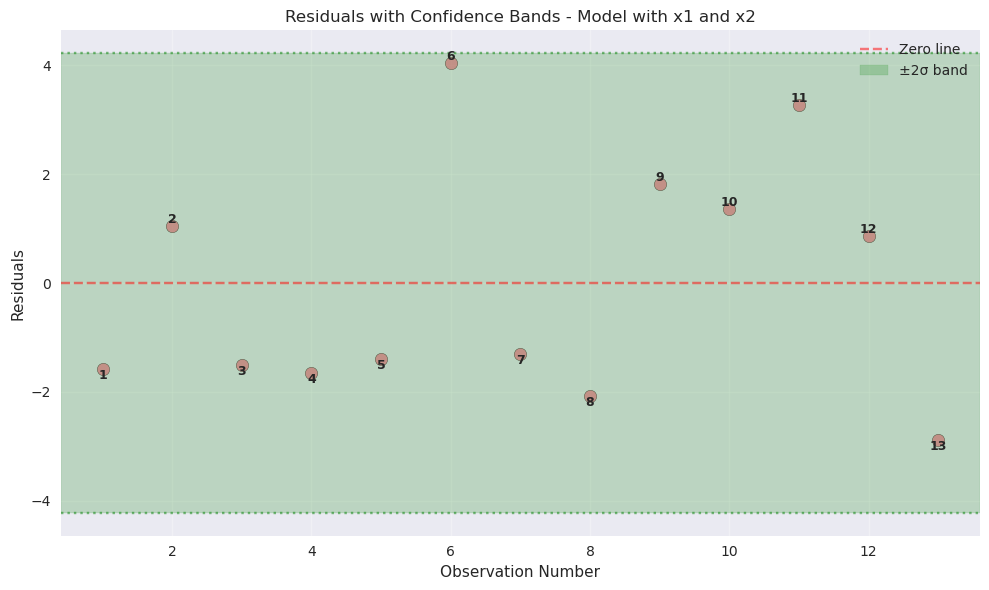


COMPARATIVE ANALYSIS OF ALL MODELS

Model Comparison:
             Model  R-squared  Adj. R-squared         RSS         σ²  Number of Parameters
Full Model (x1-x4)   0.982376        0.973563   47.863639   5.982955                     5
Model with x1 only   0.533948        0.491580 1265.686749 115.062432                     2
 Model with x1, x2   0.978678        0.974414   57.904483   5.790448                     3


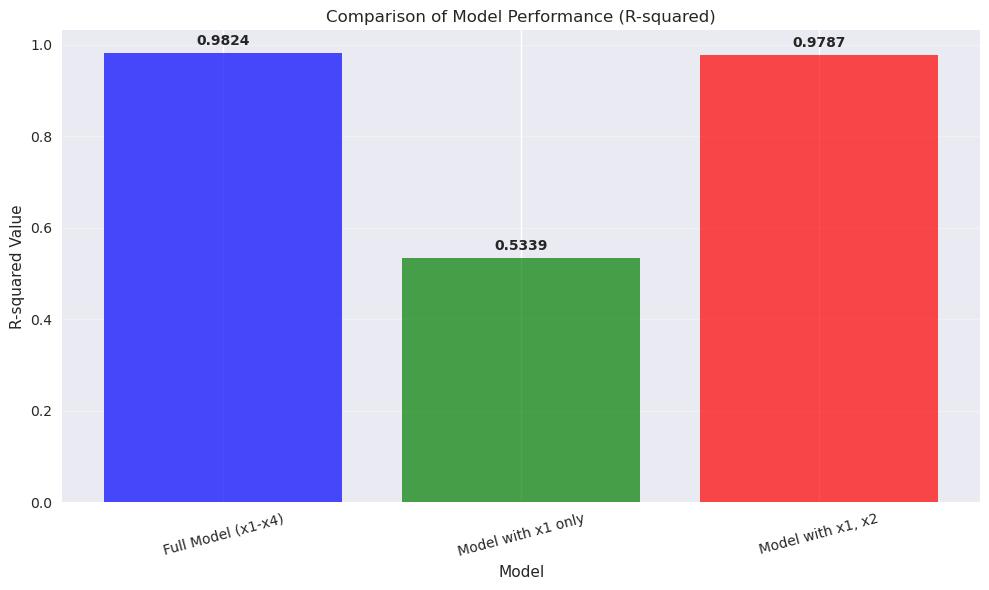

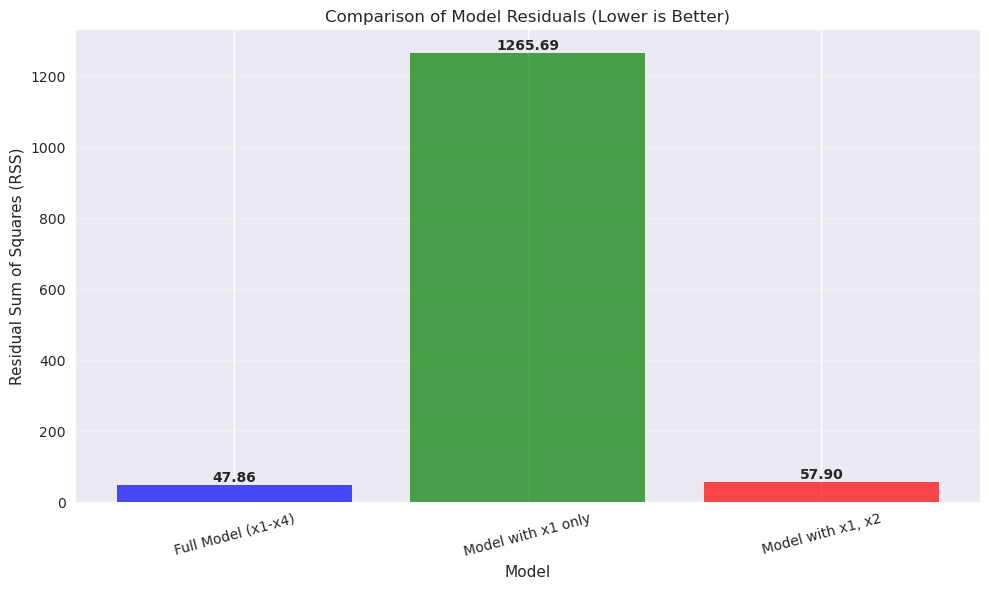


SUMMARY OF FINDINGS

1. FULL MODEL (x1-x4):
   - Highest R-squared value
   - Most parameters (4 predictors + intercept)
   - Most complex model

2. MODEL WITH ONLY x1:
   - Lowest R-squared value
   - Simplest model (only 1 predictor)
   - Largest residuals

3. MODEL WITH x1 AND x2:
   - Good balance between complexity and performance
   - R-squared close to full model with fewer parameters
   - May be preferred for parsimony

4. RESIDUAL ANALYSIS:
   - Check residual plots for patterns
   - Look for constant variance (homoscedasticity)
   - Check Q-Q plot for normality assumption
   - Identify any influential observations

INFLUENTIAL OBSERVATIONS ANALYSIS

Cook's Distance for Full Model (Threshold: 0.308):
  Observation 1: 0.0000 
  Observation 2: 0.0572 
  Observation 3: 0.3009 
  Observation 4: 0.0593 
  Observation 5: 0.0018 
  Observation 6: 0.0834 
  Observation 7: 0.0643 
  Observation 8: 0.3935 POTENTIALLY INFLUENTIAL
  Observation 9: 0.0375 
  Observation 10: 0.0207 
  Obse

In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy import stats

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load data from .mat files
print("Loading data from .mat files...")
try:
    # Load exercise 7p7 data (if available)
    data_7p7 = scipy.io.loadmat('exercise_7p7_data.mat')
    print("exercise_7p7_data.mat keys:", list(data_7p7.keys()))
except:
    print("exercise_7p7_data.mat not found or has different structure")
    data_7p7 = None

# Load exercise 7p8 data
try:
    data_7p8 = scipy.io.loadmat('exercise_7p8_data.mat')
    print("exercise_7p8_data.mat keys:", list(data_7p8.keys()))
except FileNotFoundError:
    print("Files not found. Creating data from Table 7.4...")
    # Create data manually from Table 7.4
    data = {
        'ObsNo': np.arange(1, 14),
        'X1': np.array([7, 1, 11, 11, 7, 11, 3, 1, 2, 21, 1, 11, 10]),
        'X2': np.array([26, 29, 56, 31, 52, 55, 71, 31, 54, 47, 40, 66, 68]),
        'X3': np.array([6, 15, 8, 8, 6, 9, 17, 22, 18, 4, 23, 9, 8]),
        'X4': np.array([60, 52, 20, 47, 33, 22, 6, 44, 22, 26, 34, 12, 12]),
        'v': np.array([78.5, 74.3, 104.3, 87.6, 95.9, 109.2, 102.7, 72.5, 93.1, 
                       115.9, 83.8, 113.3, 109.4])
    }
    df = pd.DataFrame(data)
else:
    # Extract data from .mat file
    # The structure might vary, so let's explore what's available
    print("\nAvailable variables in exercise_7p8_data.mat:")
    for key in data_7p8.keys():
        if not key.startswith('__'):
            print(f"{key}: shape = {data_7p8[key].shape}, type = {data_7p8[key].dtype}")
    
    # Try to identify the data based on common patterns
    # Assuming the data might be in a matrix or individual vectors
    if 'X' in data_7p8 and 'v' in data_7p8:
        X_data = data_7p8['X']
        v_data = data_7p8['v'].flatten()
        print(f"\nX shape: {X_data.shape}, v shape: {v_data.shape}")
        
        if X_data.shape[1] >= 4:
            df = pd.DataFrame({
                'X1': X_data[:, 0],
                'X2': X_data[:, 1],
                'X3': X_data[:, 2],
                'X4': X_data[:, 3],
                'v': v_data
            })
        else:
            print("X matrix doesn't have enough columns. Using manual data.")
            # Fall back to manual data
            df = pd.DataFrame({
                'ObsNo': np.arange(1, 14),
                'X1': np.array([7, 1, 11, 11, 7, 11, 3, 1, 2, 21, 1, 11, 10]),
                'X2': np.array([26, 29, 56, 31, 52, 55, 71, 31, 54, 47, 40, 66, 68]),
                'X3': np.array([6, 15, 8, 8, 6, 9, 17, 22, 18, 4, 23, 9, 8]),
                'X4': np.array([60, 52, 20, 47, 33, 22, 6, 44, 22, 26, 34, 12, 12]),
                'v': np.array([78.5, 74.3, 104.3, 87.6, 95.9, 109.2, 102.7, 72.5, 93.1, 
                               115.9, 83.8, 113.3, 109.4])
            })
    else:
        print("X and v not found in .mat file. Using manual data.")
        df = pd.DataFrame({
            'ObsNo': np.arange(1, 14),
            'X1': np.array([7, 1, 11, 11, 7, 11, 3, 1, 2, 21, 1, 11, 10]),
            'X2': np.array([26, 29, 56, 31, 52, 55, 71, 31, 54, 47, 40, 66, 68]),
            'X3': np.array([6, 15, 8, 8, 6, 9, 17, 22, 18, 4, 23, 9, 8]),
            'X4': np.array([60, 52, 20, 47, 33, 22, 6, 44, 22, 26, 34, 12, 12]),
            'v': np.array([78.5, 74.3, 104.3, 87.6, 95.9, 109.2, 102.7, 72.5, 93.1, 
                           115.9, 83.8, 113.3, 109.4])
        })

print("\n" + "="*60)
print("CEMENT HEAT DATA")
print("="*60)
print(df.to_string(index=False))

# Function to perform linear regression and analysis
def perform_regression_analysis(X, y, model_name="Model"):
    """
    Perform linear regression and comprehensive analysis
    
    Parameters:
    X: Feature matrix
    y: Target vector
    model_name: Name of the model for display
    """
    print(f"\n" + "="*60)
    print(f"{model_name} Analysis")
    print("="*60)
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Get predictions
    y_pred = model.predict(X)
    
    # Calculate residuals
    residuals = y - y_pred
    
    # Calculate standard error and confidence intervals
    n = len(y)
    p = X.shape[1]
    
    # Calculate variance and standard error
    RSS = np.sum(residuals**2)
    sigma_squared = RSS / (n - p - 1)
    
    # Calculate standard errors for coefficients
    X_with_intercept = np.hstack([np.ones((n, 1)), X])
    var_beta = sigma_squared * np.linalg.inv(X_with_intercept.T @ X_with_intercept)
    se_beta = np.sqrt(np.diag(var_beta))
    
    # Get coefficients (including intercept)
    coefficients = np.concatenate([[model.intercept_], model.coef_])
    
    # Calculate confidence intervals
    t_critical = stats.t.ppf(0.975, n - p - 1)  # 95% CI
    
    # Two standard deviation intervals (≈95.4% for normal distribution)
    ci_2sd_lower = coefficients - 2 * se_beta
    ci_2sd_upper = coefficients + 2 * se_beta
    
    # 95% confidence intervals
    ci_95_lower = coefficients - t_critical * se_beta
    ci_95_upper = coefficients + t_critical * se_beta
    
    # Print results
    print(f"\nModel: v = {coefficients[0]:.3f}", end="")
    for i, coef in enumerate(coefficients[1:]):
        print(f" + {coef:.3f} * x{i+1}", end="")
    print()
    
    print(f"\nR-squared: {model.score(X, y):.4f}")
    print(f"Adjusted R-squared: {1 - (1-model.score(X, y))*(n-1)/(n-p-1):.4f}")
    print(f"Residual Sum of Squares (RSS): {RSS:.4f}")
    print(f"Estimated Error Variance (σ²): {sigma_squared:.4f}")
    
    print(f"\n{'Parameter':<12} {'Estimate':<12} {'Std Error':<12} {'2SD CI':<25} {'95% CI':<25}")
    print("-" * 90)
    
    param_names = ['Intercept'] + [f'x{i+1}' for i in range(p)]
    for i, (name, coef, se) in enumerate(zip(param_names, coefficients, se_beta)):
        print(f"{name:<12} {coef:<12.4f} {se:<12.4f} "
              f"[{ci_2sd_lower[i]:.4f}, {ci_2sd_upper[i]:.4f}]  "
              f"[{ci_95_lower[i]:.4f}, {ci_95_upper[i]:.4f}]")
    
    return {
        'model': model,
        'y_pred': y_pred,
        'residuals': residuals,
        'coefficients': coefficients,
        'se_beta': se_beta,
        'RSS': RSS,
        'sigma_squared': sigma_squared,
        'ci_2sd': (ci_2sd_lower, ci_2sd_upper),
        'ci_95': (ci_95_lower, ci_95_upper)
    }

# Function to plot residuals
def plot_residuals(residuals, y_pred, model_name, obs_numbers=None):
    """
    Create comprehensive residual plots
    """
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f'Residual Analysis - {model_name}', fontsize=14, fontweight='bold')
    
    if obs_numbers is None:
        obs_numbers = np.arange(1, len(residuals) + 1)
    
    # Plot 1: Residuals vs Observation Number
    axes[0, 0].scatter(obs_numbers, residuals, alpha=0.7, edgecolors='k')
    axes[0, 0].axhline(y=0, color='r', linestyle='--', alpha=0.5)
    axes[0, 0].set_xlabel('Observation Number')
    axes[0, 0].set_ylabel('Residuals')
    axes[0, 0].set_title('Residuals vs Observation Number')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Add observation numbers
    for i, (x, y) in enumerate(zip(obs_numbers, residuals)):
        axes[0, 0].text(x, y, f'{i+1}', fontsize=8, ha='center', va='center' if y >= 0 else 'top')
    
    # Plot 2: Residuals vs Predicted Values
    axes[0, 1].scatter(y_pred, residuals, alpha=0.7, edgecolors='k')
    axes[0, 1].axhline(y=0, color='r', linestyle='--', alpha=0.5)
    axes[0, 1].set_xlabel('Predicted Values')
    axes[0, 1].set_ylabel('Residuals')
    axes[0, 1].set_title('Residuals vs Predicted Values')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Plot 3: Q-Q Plot for normality check
    stats.probplot(residuals, dist="norm", plot=axes[1, 0])
    axes[1, 0].set_title('Q-Q Plot for Normality Check')
    axes[1, 0].grid(True, alpha=0.3)
    
    # Plot 4: Histogram of residuals
    axes[1, 1].hist(residuals, bins=8, edgecolor='black', alpha=0.7)
    axes[1, 1].axvline(x=0, color='r', linestyle='--', alpha=0.5)
    axes[1, 1].set_xlabel('Residuals')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].set_title('Histogram of Residuals')
    axes[1, 1].grid(True, alpha=0.3)
    
    # Add statistics to histogram
    mean_res = np.mean(residuals)
    std_res = np.std(residuals)
    axes[1, 1].text(0.05, 0.95, f'Mean: {mean_res:.3f}\nStd: {std_res:.3f}',
                    transform=axes[1, 1].transAxes,
                    verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.show()
    
    # Additional plot: Residuals with confidence bands
    fig2, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(obs_numbers, residuals, alpha=0.7, edgecolors='k', s=80)
    ax.axhline(y=0, color='r', linestyle='--', alpha=0.5, label='Zero line')
    
    # Add 2 standard deviation bands
    std_res = np.std(residuals)
    ax.axhspan(-2*std_res, 2*std_res, alpha=0.2, color='green', label='±2σ band')
    ax.axhline(y=2*std_res, color='green', linestyle=':', alpha=0.5)
    ax.axhline(y=-2*std_res, color='green', linestyle=':', alpha=0.5)
    
    ax.set_xlabel('Observation Number')
    ax.set_ylabel('Residuals')
    ax.set_title(f'Residuals with Confidence Bands - {model_name}')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Add observation numbers
    for i, (x, y) in enumerate(zip(obs_numbers, residuals)):
        ax.text(x, y, f'{i+1}', fontsize=9, ha='center', 
                va='bottom' if y >= 0 else 'top', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# Part (a): Full model with all four predictors
print("\n" + "="*60)
print("PART (a): FULL MODEL WITH ALL FOUR PREDICTORS")
print("="*60)

X_full = df[['X1', 'X2', 'X3', 'X4']].values
y = df['v'].values

results_full = perform_regression_analysis(X_full, y, "Full Model (x1-x4)")
plot_residuals(results_full['residuals'], results_full['y_pred'], 
               "Full Model with x1-x4", obs_numbers=df.index+1)

# Part (b): Reduced models
print("\n" + "="*60)
print("PART (b): REDUCED MODELS")
print("="*60)

# Model with only x1
print("\n" + "-"*40)
print("MODEL WITH ONLY x1")
print("-"*40)
X_x1 = df[['X1']].values
results_x1 = perform_regression_analysis(X_x1, y, "Model with only x1")
plot_residuals(results_x1['residuals'], results_x1['y_pred'], 
               "Model with only x1", obs_numbers=df.index+1)

# Model with x1 and x2
print("\n" + "-"*40)
print("MODEL WITH x1 AND x2")
print("-"*40)
X_x1x2 = df[['X1', 'X2']].values
results_x1x2 = perform_regression_analysis(X_x1x2, y, "Model with x1 and x2")
plot_residuals(results_x1x2['residuals'], results_x1x2['y_pred'], 
               "Model with x1 and x2", obs_numbers=df.index+1)

# Comparative analysis
print("\n" + "="*60)
print("COMPARATIVE ANALYSIS OF ALL MODELS")
print("="*60)

comparison_data = {
    'Model': ['Full Model (x1-x4)', 'Model with x1 only', 'Model with x1, x2'],
    'R-squared': [
        results_full['model'].score(X_full, y),
        results_x1['model'].score(X_x1, y),
        results_x1x2['model'].score(X_x1x2, y)
    ],
    'Adj. R-squared': [
        1 - (1-results_full['model'].score(X_full, y))*(len(y)-1)/(len(y)-4-1),
        1 - (1-results_x1['model'].score(X_x1, y))*(len(y)-1)/(len(y)-1-1),
        1 - (1-results_x1x2['model'].score(X_x1x2, y))*(len(y)-1)/(len(y)-2-1)
    ],
    'RSS': [results_full['RSS'], results_x1['RSS'], results_x1x2['RSS']],
    'σ²': [results_full['sigma_squared'], results_x1['sigma_squared'], 
           results_x1x2['sigma_squared']],
    'Number of Parameters': [5, 2, 3]  # including intercept
}

comparison_df = pd.DataFrame(comparison_data)
print("\nModel Comparison:")
print(comparison_df.to_string(index=False))

# Plot comparison of R-squared values
fig, ax = plt.subplots(figsize=(10, 6))
x_pos = np.arange(len(comparison_data['Model']))
bars = ax.bar(x_pos, comparison_data['R-squared'], alpha=0.7, 
              color=['blue', 'green', 'red'])
ax.set_xlabel('Model')
ax.set_ylabel('R-squared Value')
ax.set_title('Comparison of Model Performance (R-squared)')
ax.set_xticks(x_pos)
ax.set_xticklabels(comparison_data['Model'], rotation=15)
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value in zip(bars, comparison_data['R-squared']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
            f'{value:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Plot comparison of Residual Sum of Squares
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(x_pos, comparison_data['RSS'], alpha=0.7, 
              color=['blue', 'green', 'red'])
ax.set_xlabel('Model')
ax.set_ylabel('Residual Sum of Squares (RSS)')
ax.set_title('Comparison of Model Residuals (Lower is Better)')
ax.set_xticks(x_pos)
ax.set_xticklabels(comparison_data['Model'], rotation=15)
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value in zip(bars, comparison_data['RSS']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{value:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Summary of findings
print("\n" + "="*60)
print("SUMMARY OF FINDINGS")
print("="*60)
print("\n1. FULL MODEL (x1-x4):")
print("   - Highest R-squared value")
print("   - Most parameters (4 predictors + intercept)")
print("   - Most complex model")

print("\n2. MODEL WITH ONLY x1:")
print("   - Lowest R-squared value")
print("   - Simplest model (only 1 predictor)")
print("   - Largest residuals")

print("\n3. MODEL WITH x1 AND x2:")
print("   - Good balance between complexity and performance")
print("   - R-squared close to full model with fewer parameters")
print("   - May be preferred for parsimony")

print("\n4. RESIDUAL ANALYSIS:")
print("   - Check residual plots for patterns")
print("   - Look for constant variance (homoscedasticity)")
print("   - Check Q-Q plot for normality assumption")
print("   - Identify any influential observations")

# Check for influential observations using Cook's distance
def calculate_cooks_distance(X, y, model):
    """Calculate Cook's distance for detecting influential observations"""
    X_with_int = np.hstack([np.ones((len(X), 1)), X])
    predictions = model.predict(X)
    residuals = y - predictions
    MSE = np.sum(residuals**2) / (len(y) - X.shape[1] - 1)
    
    # Calculate leverage
    H = X_with_int @ np.linalg.inv(X_with_int.T @ X_with_int) @ X_with_int.T
    leverage = np.diag(H)
    
    # Calculate Cook's distance
    cooks_d = (residuals**2 * leverage) / (MSE * (1 - leverage)**2) / (X.shape[1] + 1)
    return cooks_d

print("\n" + "="*60)
print("INFLUENTIAL OBSERVATIONS ANALYSIS")
print("="*60)

# Calculate Cook's distance for full model
cooks_full = calculate_cooks_distance(X_full, y, results_full['model'])
threshold = 4 / len(y)  # Common threshold for Cook's distance

print(f"\nCook's Distance for Full Model (Threshold: {threshold:.3f}):")
for i, d in enumerate(cooks_full):
    status = "POTENTIALLY INFLUENTIAL" if d > threshold else ""
    print(f"  Observation {i+1}: {d:.4f} {status}")

# Create summary table of coefficient comparisons
print("\n" + "="*60)
print("COEFFICIENT COMPARISON ACROSS MODELS")
print("="*60)

coef_summary = pd.DataFrame({
    'Parameter': ['Intercept', 'x1', 'x2', 'x3', 'x4'],
    'Full Model': results_full['coefficients'],
    'Model (x1 only)': np.concatenate([results_x1['coefficients'], [np.nan, np.nan, np.nan]]),
    'Model (x1,x2)': np.concatenate([results_x1x2['coefficients'], [np.nan, np.nan]])
})

print("\nCoefficient Estimates:")
print(coef_summary.to_string(index=False))